### Can you accurately predict insurance costs?

In [29]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [30]:
data_path = r"D:\kaggle101\data\insurance.csv"
df = pd.read_csv(data_path)

df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [31]:
df.shape


(1338, 7)

In [32]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [33]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Check Missing Values

In [34]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Exploratory Data Analysis

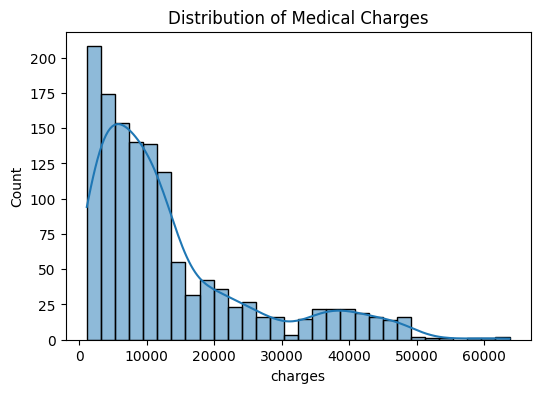

In [35]:
plt.figure(figsize=(6,4))
sns.histplot(df["charges"], kde=True)
plt.title("Distribution of Medical Charges")
plt.show()


#### Charges vs Smoker

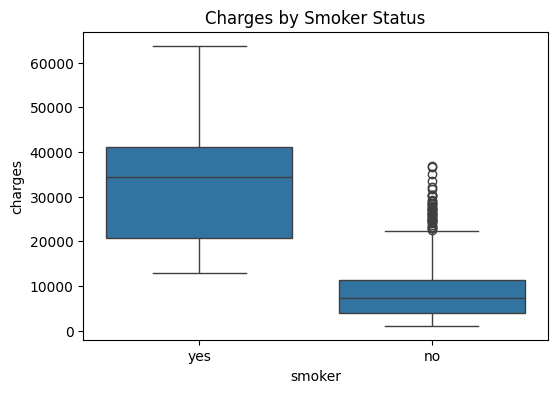

In [36]:
plt.figure(figsize=(6,4))
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Charges by Smoker Status")
plt.show()


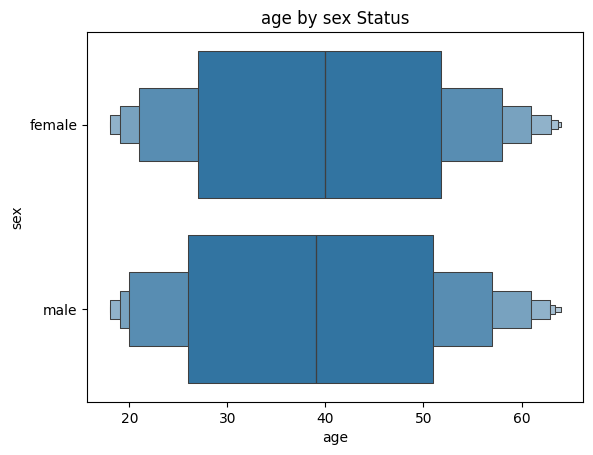

In [37]:

plt .Figure(figsize=(10,5))
sns.boxenplot(x="age", y="sex", data=df)
plt.title("age by sex Status")
plt.show()


In [38]:
X = df.drop("charges", axis=1)
y = df["charges"]


In [39]:
categorical_features = ["sex", "smoker", "region"]
numerical_features = ["age", "bmi", "children"]


In [40]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ]
)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#### Train Linear Regression Model

In [42]:
lin_reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

lin_reg.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [43]:
y_pred = lin_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Linear Regression")
print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)


Linear Regression
MAE : 4181.194473753652
RMSE: 5796.284659276275
R²  : 0.7835929767120722


In [44]:
ridge = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", Ridge(alpha=1.0))
])

ridge.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [45]:
y_pred = ridge.predict(X_test)

print("Ridge Regression")
print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²  :", r2_score(y_test, y_pred))


Ridge Regression
MAE : 4193.195352935272
RMSE: 5800.464937731764
R²  : 0.7832807188145148


In [46]:
lasso = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", Lasso(alpha=0.1))
])

lasso.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [47]:
y_pred = lasso.predict(X_test)

print("Lasso Regression")
print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²  :", r2_score(y_test, y_pred))


Lasso Regression
MAE : 4181.296901008465
RMSE: 5796.360004355883
R²  : 0.7835873505872939


In [48]:
elastic = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", ElasticNet(alpha=0.1, l1_ratio=0.5))
])

elastic.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [49]:
y_pred = elastic.predict(X_test)

print("ElasticNet")
print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²  :", r2_score(y_test, y_pred))


ElasticNet
MAE : 4788.166684329366
RMSE: 6367.47603139763
R²  : 0.7388400496362719


In [50]:
tree = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", DecisionTreeRegressor(max_depth=5, random_state=42))
])

tree.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [51]:
y_pred = tree.predict(X_test)

print("Decision Tree")
print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²  :", r2_score(y_test, y_pred))


Decision Tree
MAE : 2930.7675712410432
RMSE: 5082.505543514725
R²  : 0.8336098314514943


In [52]:
rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(
        n_estimators=200,
        random_state=42
    ))
])

rf.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [53]:
y_pred = rf.predict(X_test)

print("Random Forest")
print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²  :", r2_score(y_test, y_pred))


Random Forest
MAE : 2555.7456698780816
RMSE: 4579.22365696789
R²  : 0.8649310103918915


In [54]:
results = pd.DataFrame({
    "Model": [
        "Linear Regression", "Ridge", "Lasso",
        "ElasticNet", "Decision Tree", "Random Forest"
    ],
    "R2 Score": [
        r2_score(y_test, lin_reg.predict(X_test)),
        r2_score(y_test, ridge.predict(X_test)),
        r2_score(y_test, lasso.predict(X_test)),
        r2_score(y_test, elastic.predict(X_test)),
        r2_score(y_test, tree.predict(X_test)),
        r2_score(y_test, rf.predict(X_test))
    ]
})

results


,Model,R2 Score
0,Linear Regression,0.783593
1,Ridge,0.783281
2,Lasso,0.783587
3,ElasticNet,0.738840
4,Decision Tree,0.833610
5,Random Forest,0.864931
